In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mediapipe as mp
import cv2
import os

In [3]:
path = 'data/'

In [4]:
import os

In [5]:
os.listdir(path)

['1', '2', '3', '4', '5']

(-0.5, 639.5, 479.5, -0.5)

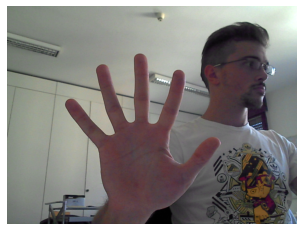

In [37]:
x = np.random.randint(0,len(os.listdir(path)))
image = cv2.imread(path+os.listdir(path)[x]+'/'+os.listdir(path+os.listdir(path)[x])[np.random.randint(0,len(os.listdir(path)[x]))])
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')

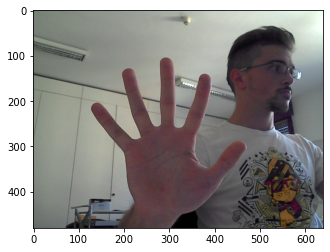

In [39]:
sample = 'data/5/1-color.png'
image = cv2.imread(sample)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [43]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,max_num_hands=1,min_detection_confidence=0.8,min_tracking_confidence=0.8)
mp_draw = mp.solutions.drawing_utils
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image.flags.writeable=False
results = hands.process(image)
image.flags.writeable=True
#image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        
        mp_draw.draw_landmarks(image = image, landmark_list = hand_landmarks,
                                  connections = mp_hands.HAND_CONNECTIONS)

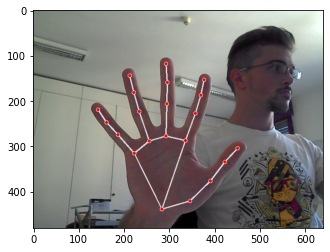

In [54]:
plt.imshow(image)

In [91]:
#results = hands.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# if results.multi_hand_landmarks:
#     print('hey')
#     for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
#         print(f'HAND NUMBER: {hand_no+1}')
#         print('-----------------------')
        
for i in range(21):
    print(f'{mp_hands.HandLandmark(i).name}:')
    print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')

WRIST:
x: 0.44498077034950256
y: 0.9143527746200562
z: 8.67204846599634e-07

THUMB_CMC:
x: 0.5410912036895752
y: 0.8766323328018188
z: -0.05297918990254402

THUMB_MCP:
x: 0.6114134192466736
y: 0.7851069569587708
z: -0.07517106086015701

THUMB_IP:
x: 0.6616363525390625
y: 0.697331428527832
z: -0.09164270013570786

THUMB_TIP:
x: 0.704728901386261
y: 0.6334080100059509
z: -0.10756789892911911

INDEX_FINGER_MCP:
x: 0.5252931118011475
y: 0.5982576608657837
z: -0.050963111221790314

INDEX_FINGER_PIP:
x: 0.5601479411125183
y: 0.473466694355011
z: -0.07891504466533661

INDEX_FINGER_DIP:
x: 0.5792677402496338
y: 0.39136606454849243
z: -0.10018595308065414

INDEX_FINGER_TIP:
x: 0.5903942584991455
y: 0.31958284974098206
z: -0.11738166958093643

MIDDLE_FINGER_MCP:
x: 0.45890840888023376
y: 0.5778549313545227
z: -0.049268938601017

MIDDLE_FINGER_PIP:
x: 0.46212080121040344
y: 0.42961275577545166
z: -0.07661601901054382

MIDDLE_FINGER_DIP:
x: 0.4626077115535736
y: 0.331316202878952
z: -0.10019887983

In [30]:
l = []
s = ('x','y','z')
for i in range(21):
    for k in range(3):
        l.append(str(mp_hands.HandLandmark(i).name)+'_'+str(s[k]))

In [84]:
l = ['label'] + l

In [31]:
len(l)

63

In [90]:
hand_landmarks.landmark[0]

x: 0.44498077034950256
y: 0.9143527746200562
z: 8.67204846599634e-07

In [78]:
mp_hands.HandLandmark(2).value

2

In [87]:
df = pd.DataFrame(columns=l)

In [88]:
df

,label,WRIST_x,WRIST_y,WRIST_z,THUMB_CMC_x,THUMB_CMC_y,THUMB_CMC_z,THUMB_MCP_x,THUMB_MCP_y,THUMB_MCP_z,...,PINKY_MCP_z,PINKY_PIP_x,PINKY_PIP_y,PINKY_PIP_z,PINKY_DIP_x,PINKY_DIP_y,PINKY_DIP_z,PINKY_TIP_x,PINKY_TIP_y,PINKY_TIP_z


In [117]:
a = dict()
a['label'] = 1
for i in range(5):
    s = ('x','y','z')
    k = (hand_landmarks.landmark[i].x,hand_landmarks.landmark[i].y,hand_landmarks.landmark[i].z)
    for j in range(len(k)):
        a[str(mp_hands.HandLandmark(i).name)+'_'+str(s[j])] = k[j]
        

In [109]:
for i in range(5):
    print(f'{mp_hands.HandLandmark(i).name}:')
    print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')

WRIST:
x: 0.44498077034950256
y: 0.9143527746200562
z: 8.67204846599634e-07

THUMB_CMC:
x: 0.5410912036895752
y: 0.8766323328018188
z: -0.05297918990254402

THUMB_MCP:
x: 0.6114134192466736
y: 0.7851069569587708
z: -0.07517106086015701

THUMB_IP:
x: 0.6616363525390625
y: 0.697331428527832
z: -0.09164270013570786

THUMB_TIP:
x: 0.704728901386261
y: 0.6334080100059509
z: -0.10756789892911911



In [110]:
a

{'label': 1,
 'WRIST_x': 0.44498077034950256,
 'WRIST_y': 0.9143527746200562,
 'WRIST_z': 8.67204846599634e-07,
 'THUMB_CMC_x': 0.5410912036895752,
 'THUMB_CMC_y': 0.8766323328018188,
 'THUMB_CMC_z': -0.05297918990254402,
 'THUMB_MCP_x': 0.6114134192466736,
 'THUMB_MCP_y': 0.7851069569587708,
 'THUMB_MCP_z': -0.07517106086015701,
 'THUMB_IP_x': 0.6616363525390625,
 'THUMB_IP_y': 0.697331428527832,
 'THUMB_IP_z': -0.09164270013570786,
 'THUMB_TIP_x': 0.704728901386261,
 'THUMB_TIP_y': 0.6334080100059509,
 'THUMB_TIP_z': -0.10756789892911911}

In [151]:
for t in range(1,6):
    path = 'data/'+str(t)+'/'
    images = os.listdir(path)
    for i in images:
        image = cv2.imread(path+i)
        mp_hands = mp.solutions.hands
        hands = mp_hands.Hands(static_image_mode=False,max_num_hands=1,min_detection_confidence=0.8,min_tracking_confidence=0.8)
        mp_draw = mp.solutions.drawing_utils
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image.flags.writeable=False
        results = hands.process(image)
        image.flags.writeable=True
        #image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
    
            for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
            
                mp_draw.draw_landmarks(image = image, landmark_list = hand_landmarks,
                                  connections = mp_hands.HAND_CONNECTIONS)
        a = dict()
        a['label'] = t
        for i in range(21):
            s = ('x','y','z')
            k = (hand_landmarks.landmark[i].x,hand_landmarks.landmark[i].y,hand_landmarks.landmark[i].z)
            for j in range(len(k)):
                a[str(mp_hands.HandLandmark(i).name)+'_'+str(s[j])] = k[j]
        df = df.append(a,ignore_index=True)

In [152]:
len(a)

64

In [5]:
df.tail()

,label,WRIST_x,WRIST_y,WRIST_z,THUMB_CMC_x,THUMB_CMC_y,THUMB_CMC_z,THUMB_MCP_x,THUMB_MCP_y,THUMB_MCP_z,...,PINKY_MCP_z,PINKY_PIP_x,PINKY_PIP_y,PINKY_PIP_z,PINKY_DIP_x,PINKY_DIP_y,PINKY_DIP_z,PINKY_TIP_x,PINKY_TIP_y,PINKY_TIP_z
145,5,0.439210,0.868163,1.070000e-06,0.535292,0.879331,-0.057584,0.623323,0.844680,-0.086184,...,-0.059314,0.396307,0.474927,-0.095645,0.378313,0.405611,-0.115440,0.369191,0.339365,-0.125754
146,5,0.445683,0.865705,1.010000e-06,0.545279,0.871856,-0.050937,0.626168,0.827091,-0.074078,...,-0.042450,0.387047,0.489180,-0.073586,0.367515,0.422594,-0.092091,0.355742,0.361695,-0.102264
147,5,0.446519,0.883224,7.740000e-07,0.544095,0.857858,-0.045163,0.615026,0.781445,-0.062741,...,-0.037089,0.327484,0.531514,-0.066232,0.298005,0.472665,-0.084519,0.276640,0.415129,-0.094767
148,5,0.466533,0.892098,6.610000e-07,0.553741,0.837183,-0.040325,0.607027,0.735094,-0.055962,...,-0.050788,0.286424,0.578896,-0.084231,0.245697,0.528308,-0.103554,0.211919,0.475580,-0.114363
149,5,0.472429,0.875768,7.620000e-07,0.553774,0.807623,-0.048666,0.601156,0.697512,-0.074787,...,-0.088848,0.262912,0.631280,-0.132882,0.210421,0.596898,-0.156359,0.164732,0.554876,-0.170293


In [6]:
df['label'].replace(5,0)

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: label, Length: 150, dtype: int64

In [7]:
ex_df = df

In [8]:
ex_df['label'] = df['label'].replace(5,0)

In [154]:
df.to_csv('hand_sign_landmarks.csv')

In [3]:
df = pd.read_csv('hand_sign_landmarks.csv')

In [9]:
df = ex_df

In [10]:
df.head()

,label,WRIST_x,WRIST_y,WRIST_z,THUMB_CMC_x,THUMB_CMC_y,THUMB_CMC_z,THUMB_MCP_x,THUMB_MCP_y,THUMB_MCP_z,...,PINKY_MCP_z,PINKY_PIP_x,PINKY_PIP_y,PINKY_PIP_z,PINKY_DIP_x,PINKY_DIP_y,PINKY_DIP_z,PINKY_TIP_x,PINKY_TIP_y,PINKY_TIP_z
0,1,0.494290,0.740492,-5.290000e-07,0.565995,0.715549,-0.037449,0.641199,0.648631,-0.054619,...,-0.034914,0.443997,0.389487,-0.058318,0.454568,0.325669,-0.062233,0.466815,0.265317,-0.056713
1,1,0.479944,0.727526,-7.800000e-07,0.558227,0.693296,-0.023592,0.617136,0.636407,-0.041313,...,-0.065270,0.426173,0.415596,-0.093006,0.428549,0.345037,-0.099812,0.433505,0.283381,-0.097505
2,1,0.465350,0.756044,-5.800000e-07,0.539325,0.735982,-0.046931,0.613042,0.679432,-0.070329,...,-0.038118,0.428774,0.397504,-0.064631,0.440521,0.331955,-0.069178,0.452976,0.273568,-0.062509
3,1,0.471480,0.758846,-4.000000e-07,0.549038,0.723999,-0.029838,0.609089,0.652810,-0.040632,...,-0.007460,0.437453,0.444208,-0.022506,0.451893,0.398941,-0.016863,0.464893,0.357341,-0.004862
4,1,0.474729,0.750106,-3.140000e-07,0.548460,0.715436,-0.026488,0.604415,0.646731,-0.035522,...,-0.003404,0.440845,0.460966,-0.014969,0.456376,0.422884,-0.009224,0.469045,0.387599,0.001314


In [11]:
df.tail()

,label,WRIST_x,WRIST_y,WRIST_z,THUMB_CMC_x,THUMB_CMC_y,THUMB_CMC_z,THUMB_MCP_x,THUMB_MCP_y,THUMB_MCP_z,...,PINKY_MCP_z,PINKY_PIP_x,PINKY_PIP_y,PINKY_PIP_z,PINKY_DIP_x,PINKY_DIP_y,PINKY_DIP_z,PINKY_TIP_x,PINKY_TIP_y,PINKY_TIP_z
145,0,0.439210,0.868163,1.070000e-06,0.535292,0.879331,-0.057584,0.623323,0.844680,-0.086184,...,-0.059314,0.396307,0.474927,-0.095645,0.378313,0.405611,-0.115440,0.369191,0.339365,-0.125754
146,0,0.445683,0.865705,1.010000e-06,0.545279,0.871856,-0.050937,0.626168,0.827091,-0.074078,...,-0.042450,0.387047,0.489180,-0.073586,0.367515,0.422594,-0.092091,0.355742,0.361695,-0.102264
147,0,0.446519,0.883224,7.740000e-07,0.544095,0.857858,-0.045163,0.615026,0.781445,-0.062741,...,-0.037089,0.327484,0.531514,-0.066232,0.298005,0.472665,-0.084519,0.276640,0.415129,-0.094767
148,0,0.466533,0.892098,6.610000e-07,0.553741,0.837183,-0.040325,0.607027,0.735094,-0.055962,...,-0.050788,0.286424,0.578896,-0.084231,0.245697,0.528308,-0.103554,0.211919,0.475580,-0.114363
149,0,0.472429,0.875768,7.620000e-07,0.553774,0.807623,-0.048666,0.601156,0.697512,-0.074787,...,-0.088848,0.262912,0.631280,-0.132882,0.210421,0.596898,-0.156359,0.164732,0.554876,-0.170293


In [12]:
from tensorflow.keras.models import Sequential

In [15]:
from tensorflow.keras.layers import Dense,Dropout

In [14]:
model = Sequential()

In [16]:
model.add(Dense(63,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop('label',axis=1)
y = df['label']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train.head()

,WRIST_x,WRIST_y,WRIST_z,THUMB_CMC_x,THUMB_CMC_y,THUMB_CMC_z,THUMB_MCP_x,THUMB_MCP_y,THUMB_MCP_z,THUMB_IP_x,...,PINKY_MCP_z,PINKY_PIP_x,PINKY_PIP_y,PINKY_PIP_z,PINKY_DIP_x,PINKY_DIP_y,PINKY_DIP_z,PINKY_TIP_x,PINKY_TIP_y,PINKY_TIP_z
96,0.541721,0.893956,9.500000e-07,0.612610,0.875335,-0.050687,0.658160,0.789231,-0.072167,0.615866,...,-0.069593,0.435116,0.584314,-0.108334,0.406080,0.529464,-0.130924,0.381009,0.473992,-0.143885
105,0.534223,0.911169,1.310000e-06,0.609973,0.897042,-0.079139,0.661416,0.837526,-0.132114,0.618467,...,-0.118646,0.431275,0.660418,-0.178076,0.393461,0.620253,-0.208864,0.359950,0.573783,-0.226605
66,0.515855,0.738262,1.020000e-06,0.579809,0.700242,-0.026096,0.633238,0.640300,-0.050846,0.681969,...,-0.088557,0.519086,0.608113,-0.139730,0.557819,0.657771,-0.145627,0.579447,0.692881,-0.137191
0,0.494290,0.740492,-5.290000e-07,0.565995,0.715549,-0.037449,0.641199,0.648631,-0.054619,0.658493,...,-0.034914,0.443997,0.389487,-0.058318,0.454568,0.325669,-0.062233,0.466815,0.265317,-0.056713
122,0.460596,0.877211,1.090000e-06,0.546738,0.849222,-0.064338,0.621877,0.781221,-0.104939,0.685023,...,-0.120178,0.294352,0.616313,-0.174018,0.243316,0.579081,-0.200566,0.200071,0.537913,-0.215861


In [22]:
y_train

96     4
105    4
66     3
0      1
122    0
      ..
71     3
106    4
14     1
92     4
102    4
Name: label, Length: 100, dtype: int64

In [51]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [52]:
model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
4/4 [==============================] - 1s 107ms/step - loss: 0.2459 - accuracy: 0.9100 - val_loss: 0.2492 - val_accuracy: 0.8800
Epoch 2/100
4/4 [==============================] - 0s 19ms/step - loss: 0.2618 - accuracy: 0.8600 - val_loss: 0.1341 - val_accuracy: 0.9400
Epoch 3/100
4/4 [==============================] - 0s 22ms/step - loss: 0.1937 - accuracy: 0.9100 - val_loss: 0.0657 - val_accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 0.2730 - accuracy: 0.8900 - val_loss: 0.1017 - val_accuracy: 0.9600
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 0.2193 - accuracy: 0.9200 - val_loss: 0.1554 - val_accuracy: 0.9200
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1926 - accuracy: 0.9300 - val_loss: 0.0795 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 20ms/step - loss: 0.1626 - accuracy: 0.9400 - val_loss: 0.0737 - val_accuracy: 1.0000
Epoch 8/100
4/4 [==

In [18]:
X_train.shape

(100, 63)

In [20]:
y_train.shape

(100,)

In [21]:
y.shape

(150,)

In [53]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 12ms/step - loss: 0.0723 - accuracy: 0.9800


[0.07234572619199753, 0.9800000190734863]

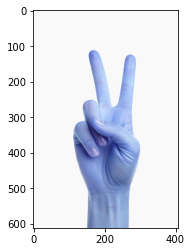

In [54]:
image = cv2.imread('hand2.jpg')
plt.imshow(image)

In [55]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,max_num_hands=1,min_detection_confidence=0.8,min_tracking_confidence=0.8)
mp_draw = mp.solutions.drawing_utils
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image.flags.writeable=False
results = hands.process(image)
image.flags.writeable=True
#image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
if results.multi_hand_landmarks:

    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
        
        mp_draw.draw_landmarks(image = image, landmark_list = hand_landmarks,
                                  connections = mp_hands.HAND_CONNECTIONS)

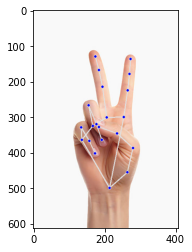

In [56]:
plt.imshow(image)

In [57]:
new_df = pd.DataFrame(columns=l)

In [58]:
a = dict()
for i in range(21):
    s = ('x','y','z')
    k = (hand_landmarks.landmark[i].x,hand_landmarks.landmark[i].y,hand_landmarks.landmark[i].z)
    for j in range(len(k)):
        a[str(mp_hands.HandLandmark(i).name)+'_'+str(s[j])] = k[j]
        #print(mp_hands.HandLandmark(i).name)
new_df = new_df.append(a,ignore_index=True)

In [59]:
mp_hands.HandLandmark(0).name

'WRIST'

In [60]:
new_df

,WRIST_x,WRIST_y,WRIST_z,THUMB_CMC_x,THUMB_CMC_y,THUMB_CMC_z,THUMB_MCP_x,THUMB_MCP_y,THUMB_MCP_z,THUMB_IP_x,...,PINKY_MCP_z,PINKY_PIP_x,PINKY_PIP_y,PINKY_PIP_z,PINKY_DIP_x,PINKY_DIP_y,PINKY_DIP_z,PINKY_TIP_x,PINKY_TIP_y,PINKY_TIP_z
0,0.527508,0.81682,0.000001,0.650987,0.744656,-0.07367,0.689045,0.632626,-0.100853,0.580552,...,-0.091413,0.330913,0.53857,-0.195582,0.388065,0.600219,-0.199302,0.428873,0.657171,-0.175944


In [42]:
new_df.columns==df.columns[1:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [61]:
pred = model.predict(new_df[0:])

In [62]:
h[np.argmax(pred)]

3

In [63]:
h[list(hey[0]).index(max(hey[0]))]

1

In [180]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [243]:
from sklearn.preprocessing import StandardScaler

In [244]:
scaler = StandardScaler()

In [245]:
X_train = scaler.fit_transform(X_train)

In [246]:
X_test = scaler.transform(X_test)

In [257]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred,y_test)

0.94

In [48]:
hey = model.predict(new_df[0:])

In [49]:
hey

array([[9.90163624e-01, 1.32629675e-05, 1.12905655e-04, 3.37817095e-04,
        9.37232934e-03]], dtype=float32)

In [64]:
model.save('hands.h5')

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 63)                4032      
                                                                 
 dropout (Dropout)           (None, 63)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8192      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 29,381
Trainable params: 29,381
Non-traina